### HPO Demo

This notebook aims to demonstrate 3 approaches in optimizing model hyper-parameters, the Grid Search, Random Grid Search and Bayesian Optimiziation using [Credit dataset](http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).
The dataset consists of 30000 records and 24 features designed for a default payment of credit card classification problem.


In [1]:
import pandas as pd
from skopt import BayesSearchCV #scikit-optimize
from skopt.space import Real, Categorical, Integer
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings('ignore')

### Data prep and basic EDA

In [2]:
data = pd.read_csv('credit.csv')
data.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print(data.shape)

(30000, 24)


In [4]:
data.dtypes

limit        int64
sex          int64
edu          int64
married      int64
age          int64
apr_delay    int64
may_delay    int64
jun_delay    int64
jul_delay    int64
aug_delay    int64
sep_delay    int64
apr_bill     int64
may_bill     int64
jun_bill     int64
jul_bill     int64
aug_bill     int64
sep_bill     int64
apr_pay      int64
may_pay      int64
jun_pay      int64
jul_pay      int64
aug_pay      int64
sep_pay      int64
default      int64
dtype: object

In [5]:
data.isna().sum()

limit        0
sex          0
edu          0
married      0
age          0
apr_delay    0
may_delay    0
jun_delay    0
jul_delay    0
aug_delay    0
sep_delay    0
apr_bill     0
may_bill     0
jun_bill     0
jul_bill     0
aug_bill     0
sep_bill     0
apr_pay      0
may_pay      0
jun_pay      0
jul_pay      0
aug_pay      0
sep_pay      0
default      0
dtype: int64

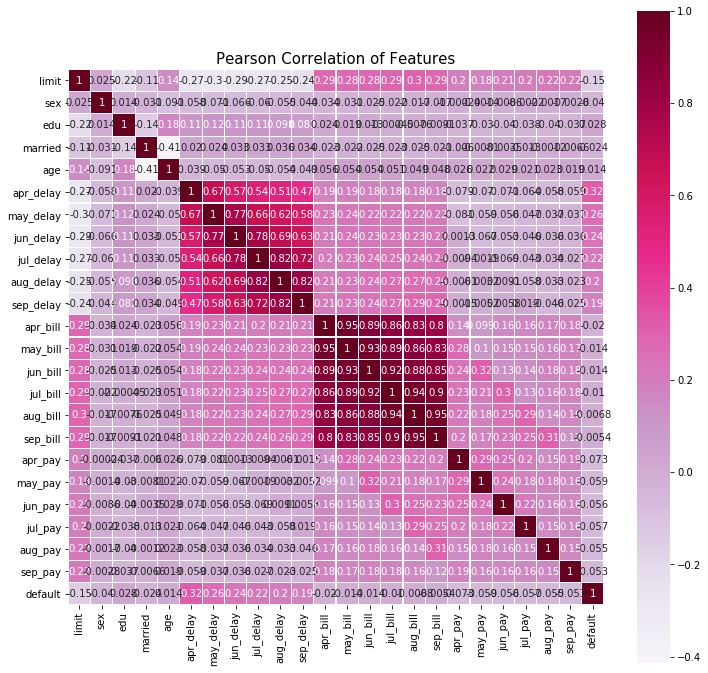

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.PuRd, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features', y=1.05, size=15);

In [7]:
df_numeric_feat = data[['limit','age','apr_bill',
       'may_bill', 'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay',
       'may_pay', 'jun_pay', 'jul_pay', 'aug_pay', 'sep_pay']]
df_cat_feat = data[['sex','married','edu','apr_delay', 'may_delay',
       'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay']]

In [8]:
Y = data['default']
X = data.drop('default',axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42,shuffle=True)

In [10]:
for feat in df_numeric_feat:
    values = X_train[feat].values[:, np.newaxis]
    scaler = MinMaxScaler().fit(values)
    X_train[feat] = scaler.transform(values)
X_train.shape

(22500, 23)

In [11]:
for feat in df_numeric_feat:
    values = X_test[feat].values[:, np.newaxis]
    scaler = MinMaxScaler().fit(values)
    X_test[feat] = scaler.transform(values)
X_test.shape

(7500, 23)

### Model building

In [42]:
def model(model_name,X_train,y_train,X_test,y_test):
    model = model_name
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    return print(model, "\naccuracy on test set:",accuracy_score(y_test, preds)),model_name    

In [43]:
knn_results,knn = model(KNeighborsClassifier(),X_train,y_train,X_test,y_test)
knn_results

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
accuracy on test set: 0.7998666666666666


In [44]:
rf_results, rf = model(RandomForestClassifier(),X_train,y_train,X_test,y_test)
rf_results

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
accuracy on test set: 0.8002666666666667


In [45]:
gradBoost_results,gradBoost = model(GradientBoostingClassifier(),X_train,y_train,X_test,y_test)
gradBoost_results

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
accuracy on test set: 0.7326666666666667


In [46]:
NB_results, NB = model(GaussianNB(),X_train,y_train,X_test,y_test)
NB_results

GaussianNB(priors=None, var_smoothing=1e-09) 
accuracy on test set: 0.7818666666666667


### Grid Search

In [74]:
start_time = time.time()
params = [{'bootstrap':[True],
     'n_estimators': [50,100,150,200],
     'criterion': ['entropy','gini'],
     'max_features':["auto", "log2"], 
     'max_depth':[2,4,6,8],
     'min_samples_split': [2,4,6,8],
     'min_samples_leaf':[1,2,3,4,5,6]}]

grid_search_cv = GridSearchCV(rf, params, cv=5,
                                  scoring="accuracy",
                                  return_train_score=True,
                                  n_jobs=-1)

grid_search_cv.fit(X_train, y_train)
print('--------------------------------------- Done in : ', time.time()-start_time, ' seconds.', '-----------------------------------------\nBest hyper-parameters:',grid_search_cv.best_params_)
print('accuracy:',grid_search_cv.best_score_)

--------------------------------------- Done in :  2653.591949939728  seconds. -----------------------------------------
Best hyper-parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
accuracy: 0.8209777777777777


#### pros:
Method goes through all possible combinations in your space.
#### cons
1x4x2x2x4x4x8 = 2048 combinations of hyper-parameters and cv=5, the algorthm will run 10240 times.

### Randomized Search

In [95]:
start_time = time.time()
params = [{'bootstrap':[True],
     'n_estimators': [50,100,150,200],
     'criterion': ['entropy','gini'],
     'max_features':["auto", "log2"], 
     'max_depth':[2,4,6,8],
     'min_samples_split': [2,4,6,8],
     'min_samples_leaf':[1,2,3,4,5,6]}]

random_search_cv = RandomizedSearchCV(rf, params, cv=5,
                                  scoring="accuracy",n_iter=35,
                                  return_train_score=True,
                                  n_jobs=-1)

random_search_cv.fit(X_train, y_train)
print('--------------------------------------- Done in : ', time.time()-start_time, ' seconds.', '-----------------------------------------\nBest hyper-parameters:',random_search_cv.best_params_)
print('accuracy:',random_search_cv.best_score_)

--------------------------------------- Done in :  134.77703619003296  seconds. -----------------------------------------
Best hyper-parameters: {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}
accuracy: 0.8203555555555555


#### pros:
    
  Specify number of n - more power over computational resources.
  
  Different values for each hyper-parameter is explored n number of times.
#### cons: 
    
   For large datasets, small portion of hyper-parameters is explored.
     

### Bayesian

In [121]:
start_time = time.time()
params = [{'bootstrap':Categorical([True]),
        'n_estimators': Integer(50,200),
        'criterion': Categorical(['entropy','gini']),
        'max_features':Categorical(["auto", "log2"]), 
        'max_depth':Integer(2,8, prior="log-uniform"),
        'min_samples_split': Integer(2,8,prior="log-unifrom"),
        'min_samples_leaf':Integer(1,8, prior = "log-uniform")}]

    
rf_bayes_search = BayesSearchCV(rf, params, n_iter=35, 
                                    scoring='accuracy', n_jobs=-1, cv=5)

rf_bayes_search.fit(X_train, y_train)
print('--------------------------------------- Done in : ', time.time()-start_time, ' seconds.', '-----------------------------------------\nBest hyper-parameters:',rf_bayes_search.best_params_)
print('accuracy:',rf_bayes_search.best_score_)

--------------------------------------- Done in :  153.71683025360107  seconds. -----------------------------------------
Best hyper-parameters: OrderedDict([('bootstrap', True), ('criterion', 'entropy'), ('max_depth', 8), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 197)])
accuracy: 0.8208444444444445


#### pros:
    Has an abilitity to zoom hyper-parameters.
    Control over n
#### cons
    Prior distributions are not easy to formulate.
     

There exist a trade off between accuracy and speed.
Grid search would be used on small data. Random Search is faster but can be inefficient on high dimensional data. For complicated algorithms and large dataset, a BO approach can be taken.